<font size="+5">#09. Cluster Analysis con k-Means</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - Simply execute the following lines of code to load the data
> - This dataset contains **statistics** (columns)
> - About **Car Models** (rows)

In [1]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
oldsmobile cutlass supreme,17.0,8,260.0,110.0,4060,19.0,77,usa
peugeot 504,23.0,4,120.0,88.0,2957,17.0,75,europe
mercury monarch,15.0,6,250.0,72.0,3432,21.0,75,usa
ford galaxie 500,14.0,8,351.0,153.0,4154,13.5,71,usa
fiat 124 sport coupe,26.0,4,98.0,90.0,2265,15.5,73,europe
toyota corona,25.0,4,113.0,95.0,2228,14.0,71,japan
amc matador (sw),15.0,8,304.0,150.0,3892,12.5,72,usa
ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa


# Data `preprocessing`

> - Do you need to *transform* the data
> - To get a **truthful insight** of the model?

In [4]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
df = df.dropna()

In [11]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [14]:
import pandas as pd

In [17]:
df = pd.get_dummies(data=df, drop_first=True)

In [20]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,0,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,0,0
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,0,1


In [35]:
dfsel = df[['mpg', 'horsepower']].copy()
dfsel

,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130.0
buick skylark 320,15.0,165.0
plymouth satellite,18.0,150.0
amc rebel sst,16.0,150.0
ford torino,17.0,140.0
...,...,...
ford mustang gl,27.0,86.0
vw pickup,44.0,52.0
dodge rampage,32.0,84.0


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [38]:
dfnorm = pd.DataFrame(scaler.fit_transform(dfsel), columns=dfsel.columns)
dfnorm

,mpg,horsepower
0,0.239362,0.456522
1,0.159574,0.646739
2,0.239362,0.565217
3,0.186170,0.565217
4,0.212766,0.510870
...,...,...
387,0.478723,0.217391
388,0.930851,0.032609
389,0.611702,0.206522
390,0.505319,0.179348


# `KMeans()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [22]:
from sklearn.cluster import KMeans

In [43]:
model = KMeans(n_clusters=3)

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

In [45]:
X = dfnorm.horsepower
y = dfnorm.mpg

### Data Visualization to Analyize Patterns

> - Visualize the 2 variables with a `scatterplot()`
> - And decide *how many `clusters`* you'd like to calculate

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

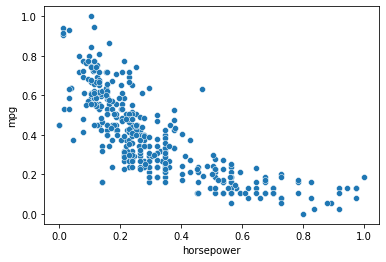

In [47]:
sns.scatterplot(x=X, y=y)

### Finally `fit()` the Model

In [50]:
model.fit(X=dfnorm)

KMeans(n_clusters=3)

## `predict()` the *cluster* for every row

> - `model.` + `↹`

In [53]:
model.predict(X=X)

ValueError: Expected 2D array, got 1D array instead:
array=[0.45652174 0.64673913 0.56521739 0.56521739 0.51086957 0.82608696
 0.94565217 0.91847826 0.97282609 0.7826087  0.67391304 0.61956522
 0.56521739 0.97282609 0.26630435 0.26630435 0.27717391 0.21195652
 0.22826087 0.         0.22282609 0.23913043 0.26630435 0.36413043
 0.23913043 0.91847826 0.83695652 0.89130435 0.79891304 0.22826087
 0.23913043 0.26630435 0.29347826 0.32065217 0.29347826 0.22826087
 0.29347826 0.64673913 0.70108696 0.58152174 0.56521739 0.72826087
 0.67391304 0.70108696 0.34782609 0.14130435 0.29347826 0.22826087
 0.2173913  0.23913043 0.13043478 0.16304348 0.10326087 0.125
 0.07608696 0.13043478 0.26630435 0.18478261 0.04347826 0.23913043
 0.2173913  0.64673913 0.70108696 0.56521739 0.58152174 0.56521739
 0.88043478 0.5923913  0.61956522 0.7826087  0.27717391 0.56521739
 0.45652174 0.51086957 0.56521739 0.35869565 0.16304348 0.22282609
 0.125      0.2173913  0.25       0.27717391 0.18478261 0.22826087
 0.70108696 0.56521739 0.53804348 0.49456522 0.56521739 0.82608696
 0.56521739 0.60869565 0.56521739 0.91847826 0.97282609 0.70108696
 0.32065217 0.29347826 0.29347826 0.22826087 0.26630435 0.
 0.56521739 0.6576087  0.67391304 0.72826087 0.29347826 0.22826087
 0.14130435 0.26086957 0.23913043 0.21195652 0.33152174 0.23913043
 0.53804348 1.         0.01630435 0.1576087  0.24456522 0.35869565
 0.56521739 0.34782609 0.41304348 0.72826087 0.26630435 0.29347826
 0.29347826 0.11413043 0.18478261 0.10326087 0.1576087  0.29347826
 0.34782609 0.32065217 0.51086957 0.56521739 0.56521739 0.51086957
 0.56521739 0.20108696 0.11413043 0.17391304 0.0326087  0.08152174
 0.1576087  0.1576087  0.1576087  0.27717391 0.25543478 0.11413043
 0.26630435 0.32065217 0.14130435 0.14130435 0.67391304 0.53804348
 0.56521739 0.55434783 0.34782609 0.32065217 0.34782609 0.26630435
 0.34782609 0.34782609 0.45108696 0.1576087  0.20108696 0.29347826
 0.17391304 0.27173913 0.13586957 0.27717391 0.27717391 0.13043478
 0.23913043 0.26630435 0.22826087 0.2826087  0.375      0.03804348
 0.2173913  0.19021739 0.25       0.17934783 0.20108696 0.51086957
 0.56521739 0.40217391 0.57608696 0.29347826 0.32065217 0.19021739
 0.23913043 0.0326087  0.07608696 0.13043478 0.03804348 0.29347826
 0.17391304 0.34782609 0.26630435 0.13586957 0.13043478 0.1576087
 0.14130435 0.30434783 0.56521739 0.22826087 0.33695652 0.40217391
 0.72826087 0.53804348 0.45652174 0.56521739 0.11956522 0.18478261
 0.06521739 0.27173913 0.13043478 0.53804348 0.34782609 0.53804348
 0.45652174 0.34782609 0.32065217 0.29347826 0.2826087  0.72826087
 0.67391304 0.7826087  0.55978261 0.17391304 0.22826087 0.1576087
 0.23369565 0.0923913  0.20108696 0.11413043 0.17391304 0.27717391
 0.34782609 0.34782609 0.01086957 0.10869565 0.0326087  0.13043478
 0.07608696 0.34782609 0.51086957 0.50543478 0.32065217 0.26630435
 0.21195652 0.22826087 0.29347826 0.23913043 0.32065217 0.21195652
 0.34782609 0.40217391 0.53804348 0.64673913 0.50543478 0.51086957
 0.11956522 0.26630435 0.27717391 0.1576087  0.26630435 0.32065217
 0.21195652 0.27717391 0.30978261 0.42934783 0.375      0.47282609
 0.13586957 0.11956522 0.375      0.21195652 0.22826087 0.23913043
 0.34782609 0.45652174 0.45108696 0.5        0.48369565 0.5923913
 0.52173913 0.42934783 0.56521739 0.13586957 0.10326087 0.18478261
 0.18478261 0.16847826 0.42934783 0.13586957 0.23913043 0.13043478
 0.13043478 0.10326087 0.125      0.23913043 0.375      0.375
 0.23913043 0.16304348 0.07608696 0.13043478 0.10326087 0.23913043
 0.22826087 0.23913043 0.23913043 0.17391304 0.23913043 0.1576087
 0.25       0.1576087  0.10326087 0.32065217 0.10326087 0.01086957
 0.01086957 0.11413043 0.11413043 0.11413043 0.11413043 0.08695652
 0.4673913  0.29347826 0.22826087 0.14130435 0.20652174 0.20652174
 0.25       0.34782609 0.20652174 0.06521739 0.09782609 0.07608696
 0.11413043 0.10326087 0.08695652 0.11956522 0.0923913  0.10326087
 0.10326087 0.15217391 0.1576087  0.1576087  0.29347826 0.15217391
 0.18478261 0.16304348 0.38043478 0.40217391 0.34782609 0.32065217
 0.22826087 0.21195652 0.22826087 0.22826087 0.22826087 0.21195652
 0.20652174 0.23913043 0.25       0.15217391 0.11956522 0.11956522
 0.0923913  0.13043478 0.22826087 0.1576087  0.13043478 0.11413043
 0.11413043 0.11413043 0.34782609 0.21195652 0.25       0.35869565
 0.27173913 0.20652174 0.23913043 0.2173913  0.0326087  0.20652174
 0.17934783 0.19565217].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [52]:
dfsel

,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130.0
buick skylark 320,15.0,165.0
plymouth satellite,18.0,150.0
amc rebel sst,16.0,150.0
ford torino,17.0,140.0
...,...,...
ford mustang gl,27.0,86.0
vw pickup,44.0,52.0
dodge rampage,32.0,84.0


> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [ ]:
df['cluster'] = ?

## Model Visualization

> - You may `hue=` the points with the `cluster` column

## Model Interpretation

In [2]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> - Can you put a **`nickname` to each group**?
> - Observe the `centroids` within `model.` + `↹`

## Model Visualization with Centroids

> - I want to see the `centroid`
> - with a **big `markers="X"`** in the plot

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [ ] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - Neural Networks
    - Linear Regression
    - Variance
- [ ] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [ ] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [ ] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**